
# Bike Assignment

Problem Statement:


BoomBikes, a US bike-sharing provider, has experienced significant revenue declines due to the ongoing COVID-19 pandemic. The company is struggling to remain viable in the current market conditions. To prepare for a resurgence in demand once the quarantine restrictions are lifted nationwide, BoomBikes aims to understand the post-pandemic demand for shared bikes. By doing so, they hope to outshine competitors and achieve substantial profits.

Objectives:

1. Identify Key Variables:** Determine which variables are significant in predicting the demand for shared bikes.
2. Assess Variable Impact:** Evaluate how well these variables explain the fluctuations in bike demand.

Goals:

1. Develop Predictive Model:** Create a model to identify significant variables affecting the demand for shared bikes using available independent variables.
2. Inform Business Strategy:** Utilize the model to guide management in strategizing to meet future demand and fulfill customer expectations.
3. Understand Market Dynamics:** Provide insights into the demand dynamics of a new market to aid management in making informed decisions.

In [236]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings("ignore")

pd.pandas.set_option('display.max_columns', None)
pd.pandas.set_option('display.max_rows', None)

# Step 1: Reading and carrying out EDA

In [237]:
#reading the dataset
bike = pd.read_csv("day.csv")

In [238]:
# Check the head of the dataset
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [239]:
bike.shape

(730, 16)

In [240]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [241]:
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [242]:
#Checking Duplicates
bike.shape,bike.drop_duplicates().shape

((730, 16), (730, 16))

Inferences:

- The Bike Dataset comprises 730 rows and 16 columns.
- There are no missing values within the provided dataset.
- No duplicate entries have been detected in the given dataset.

# Step 2: Removing Redundant Columns

- We'll remove the columns 'Instant' and 'dteday' as they serve solely as row identifiers.
- Additionally, columns 'count' and 'registered' will be dropped, as they are already encompassed within the target variable 'cnt'.

In [243]:
bike.drop(['instant','dteday','casual','registered'],axis = 1, inplace = True)

In [244]:
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


# Step 3: Mapping Values

- Notably, our dataset contains numerous categorical columns with values like 1, 2, 3, 4, etc.
- To facilitate regression analysis, it's imperative to transform these variables into dummy variables, necessitating their conversion into string format.

In [245]:
bike[['season']] = bike[['season']].apply(lambda x : x.map({1:'spring',2:'summer',3:'fall',4:'winter'}))
bike[['mnth']] = bike[['mnth']].apply(lambda x : x.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'jun',7:'jul',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'}))
bike[['weekday']] = bike[['weekday']].apply(lambda x : x.map({1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat',0:'sun'}))
bike[['weathersit']] = bike[['weathersit']].apply(lambda x : x.map({1:'clear',2:'mist & cloudy',3:'light snow & rain',4:'heavy rain & ice pallets',}))

In [246]:
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,sat,0,mist & cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,mist & cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,clear,9.305237,11.46350,43.6957,12.522300,1600


# Step 4: Visualising the Data

In [247]:
#categorical data

In [248]:
#numerical Columns
num_col=["temp","atemp","hum","windspeed","cnt"]
#categorical COlumn
cat_col=["season","yr","mnth","holiday","weekday","workingday","weathersit"]

In [249]:
#Univariate Analysis

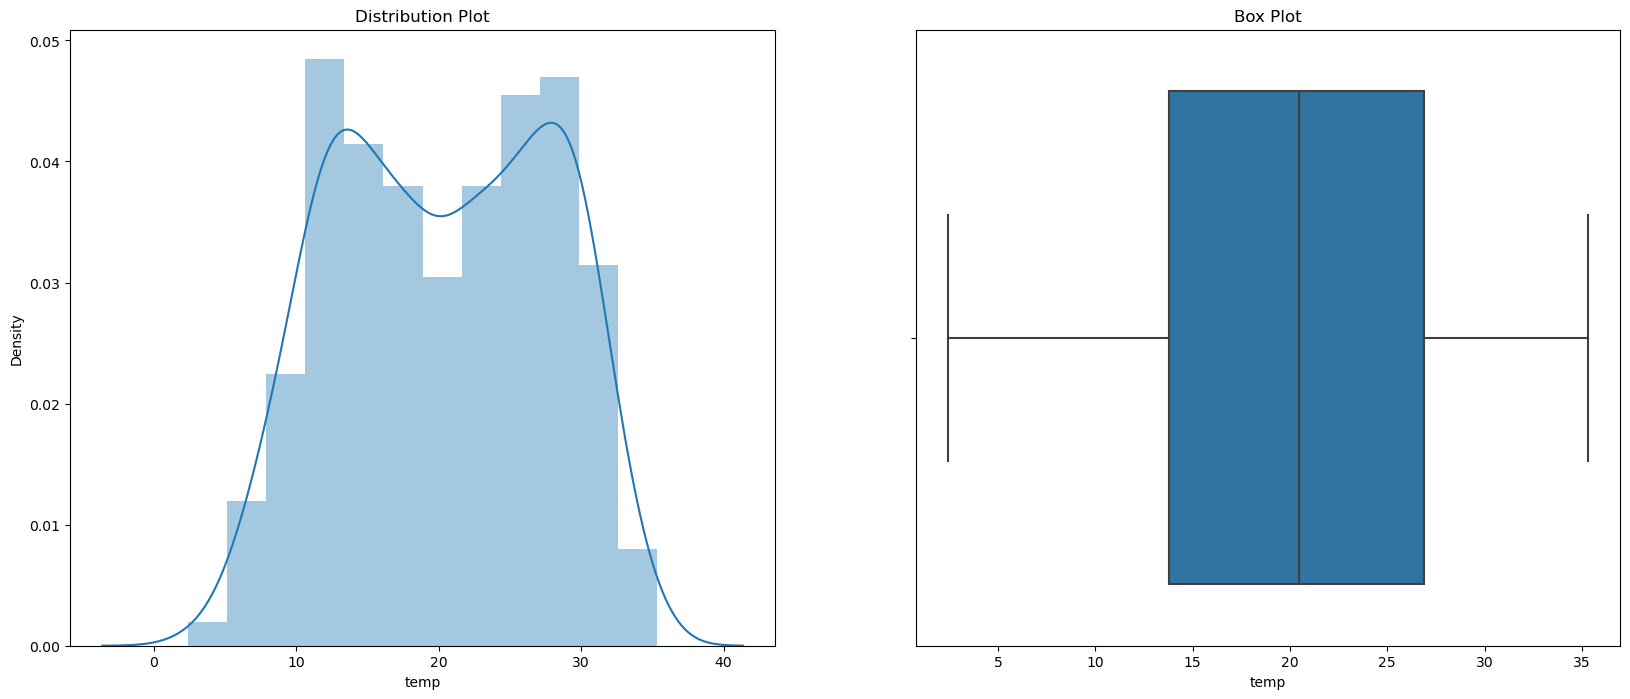

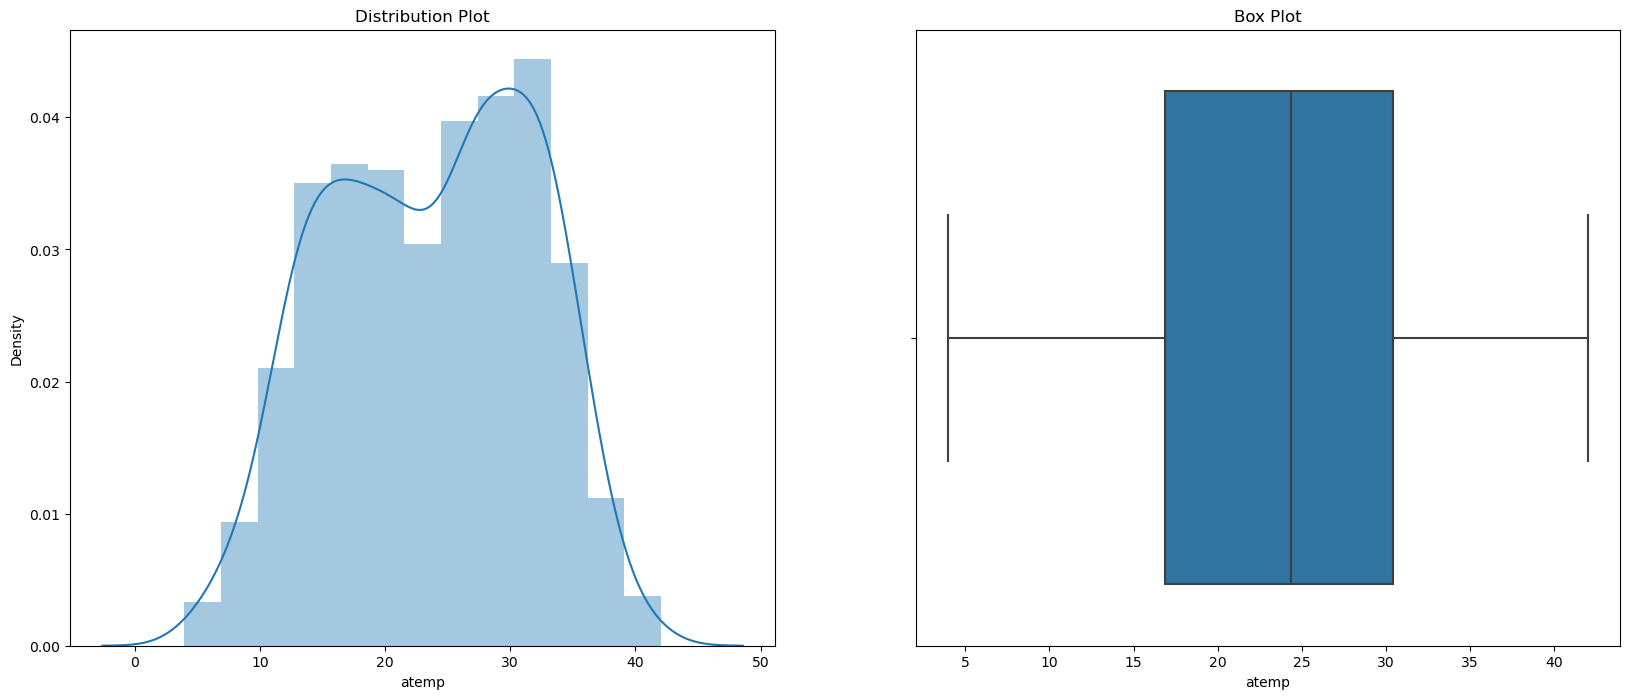

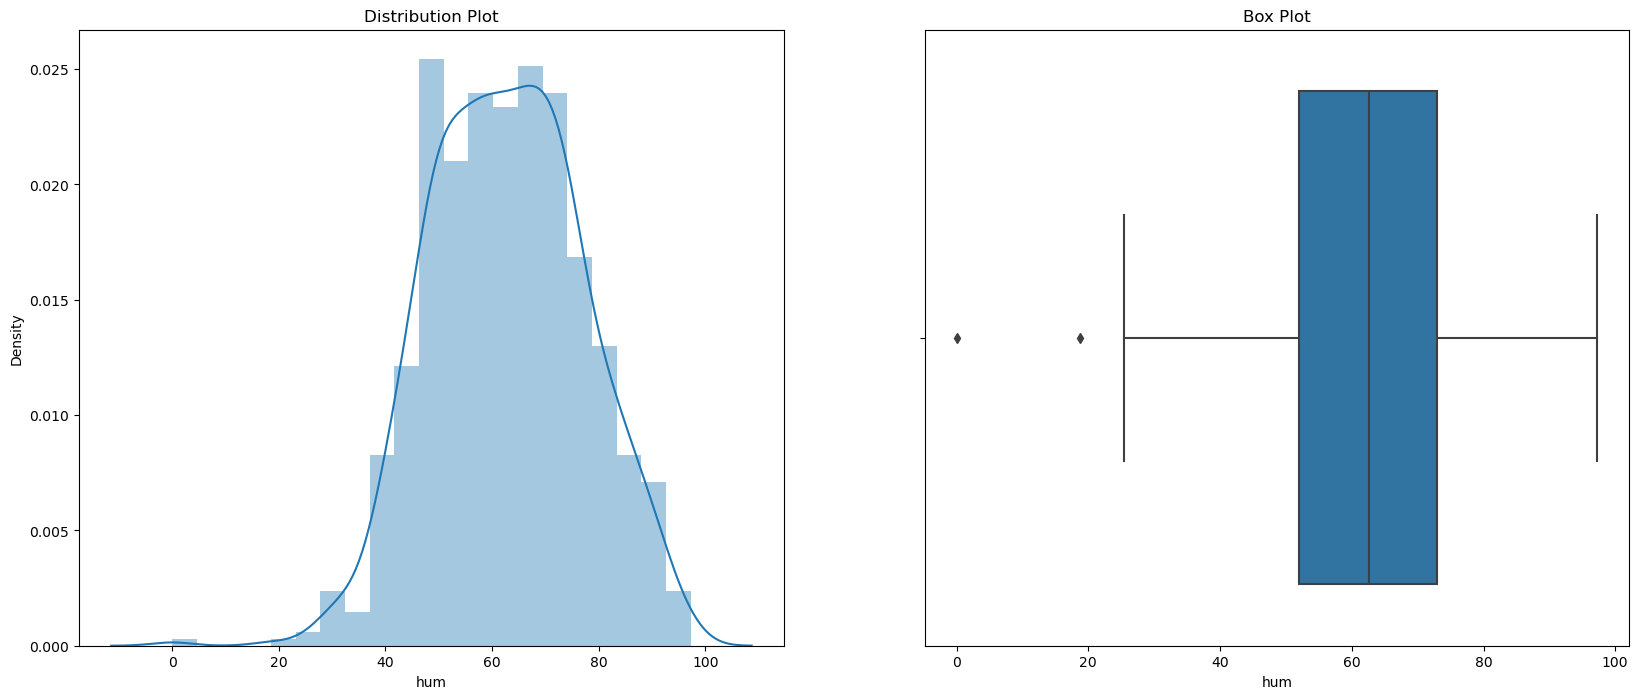

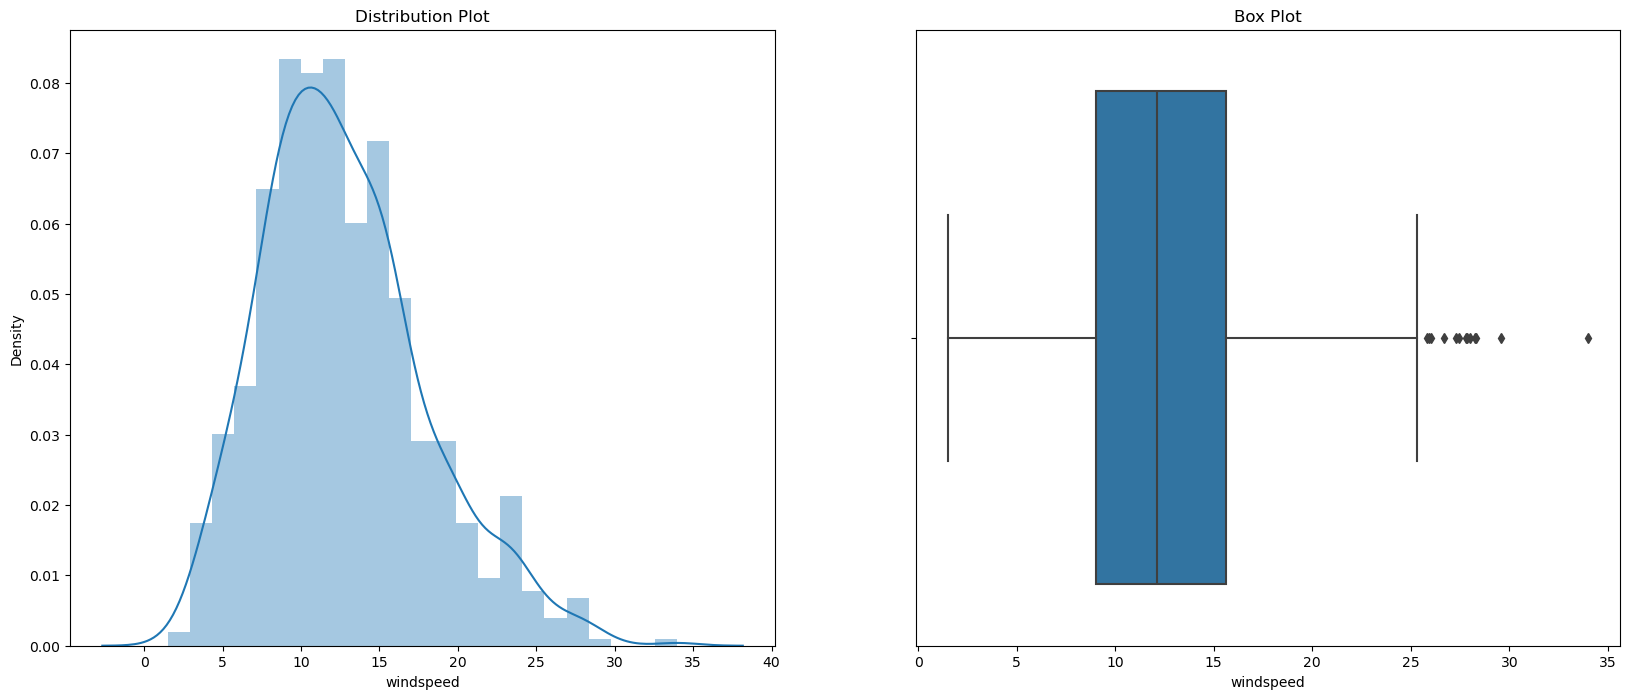

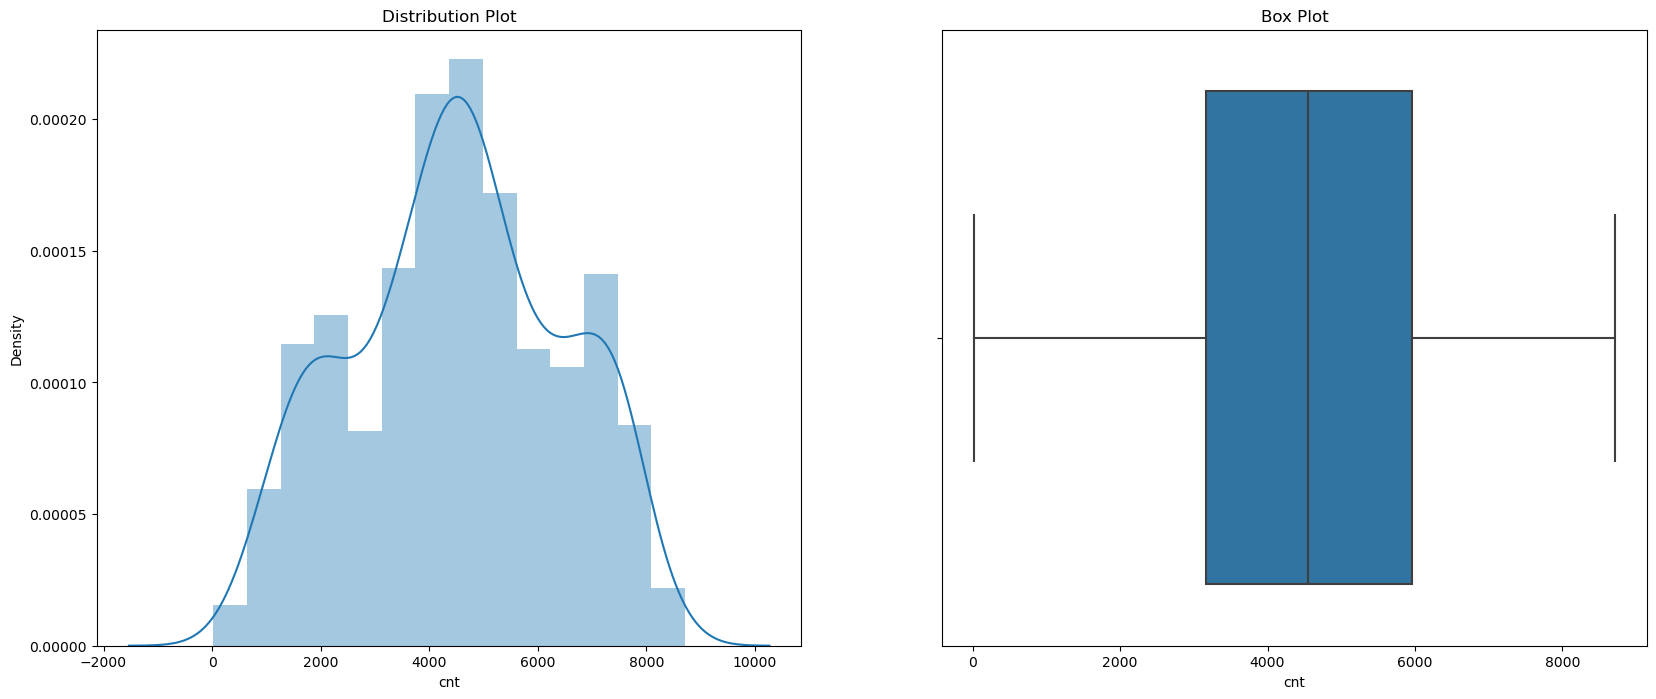

In [250]:
for i in num_col:
    fig, ax=plt.subplots(nrows =1,ncols=2,figsize=(20,8))
    ax[0].set_title("Distribution Plot")
    sns.distplot(bike[i],ax=ax[0])
    ax[1].set_title("Box Plot")
    sns.boxplot(x=bike[i])
    plt.show()

cat_cols :  season


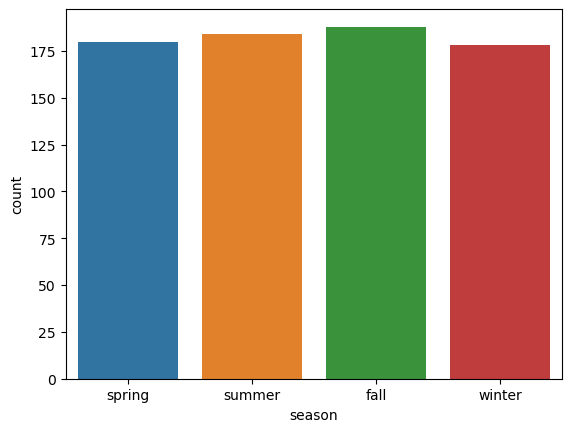

cat_cols :  yr


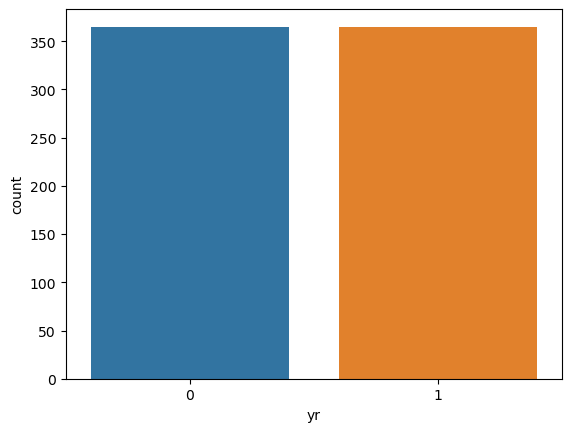

cat_cols :  mnth


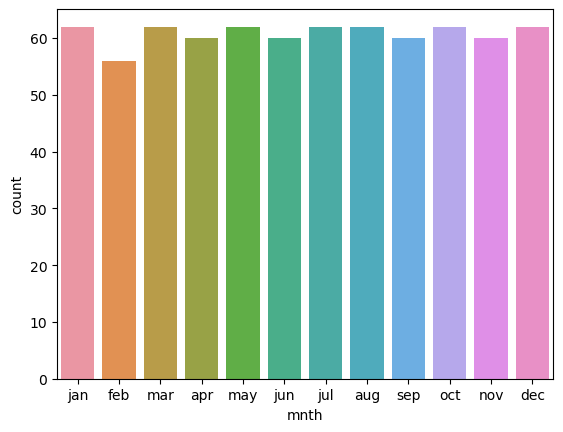

cat_cols :  holiday


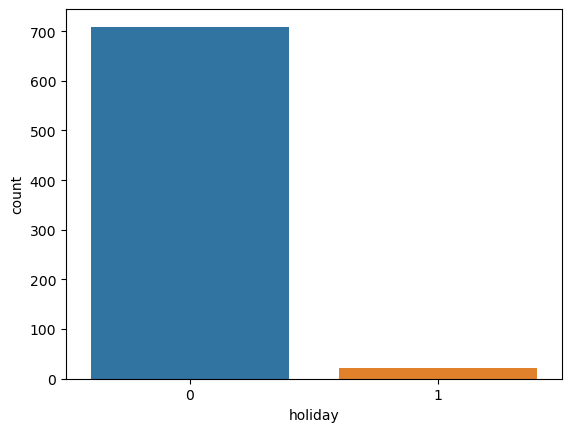

cat_cols :  weekday


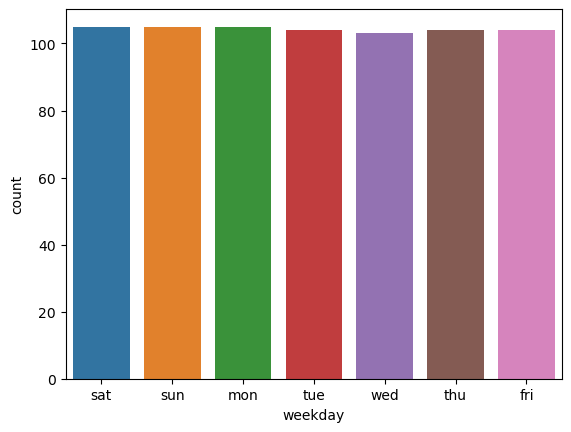

cat_cols :  workingday


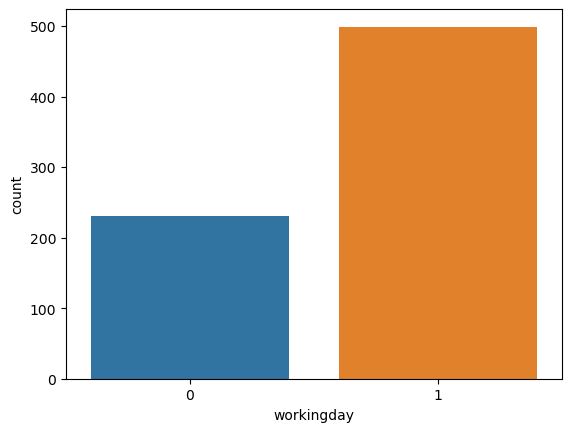

cat_cols :  weathersit


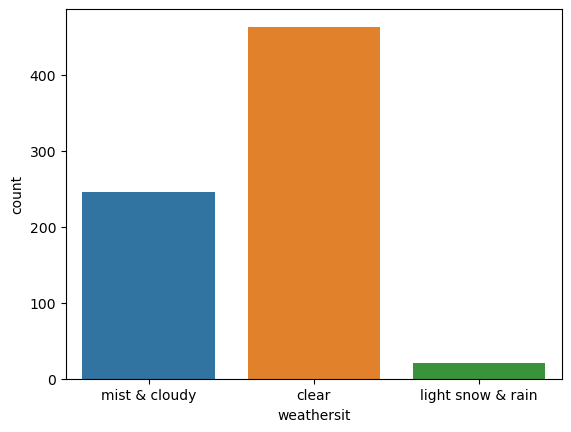

In [251]:
for i in cat_col:
    print("cat_cols : ",i)
    sns.countplot(x=bike[i])
    plt.show()

---------------- season ---------------


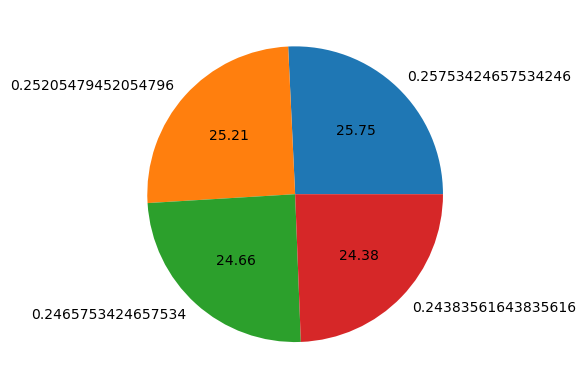

---------------- yr ---------------


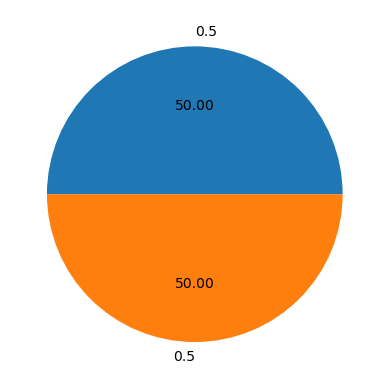

---------------- mnth ---------------


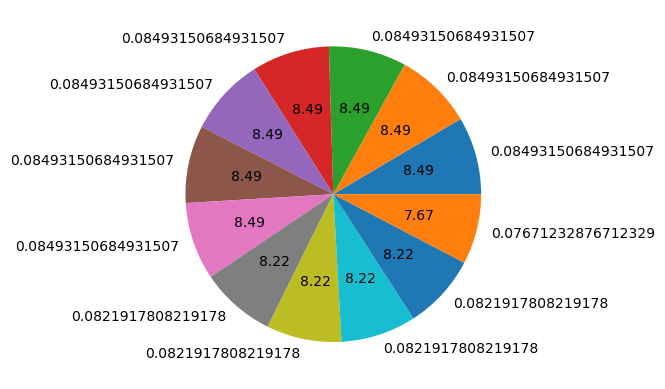

---------------- holiday ---------------


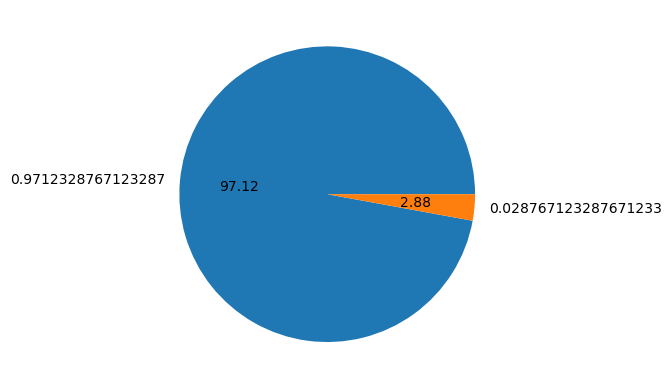

---------------- weekday ---------------


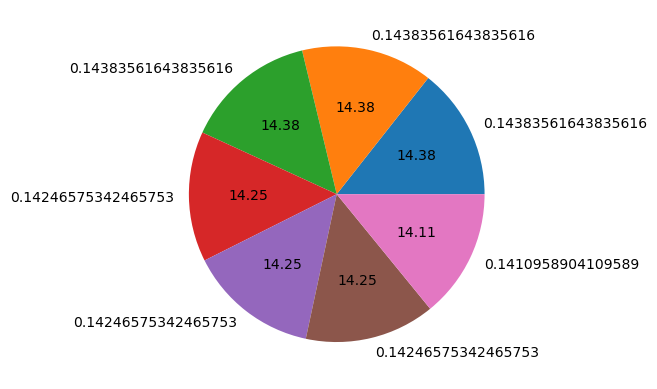

---------------- workingday ---------------


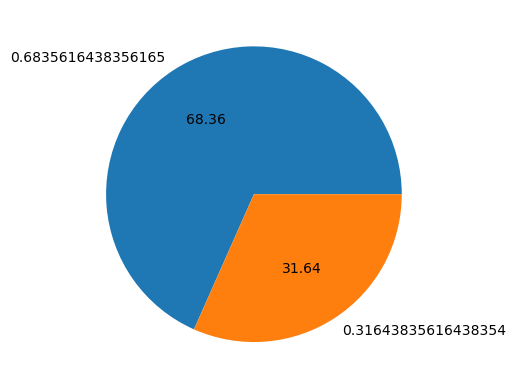

---------------- weathersit ---------------


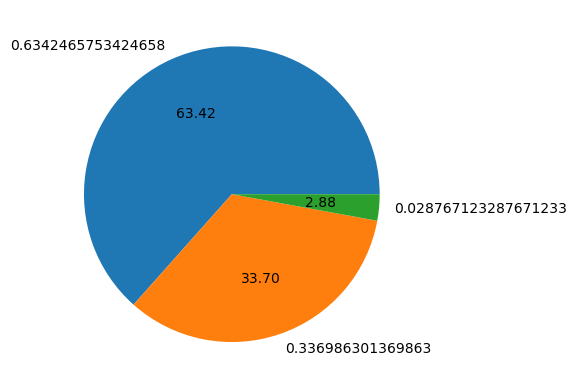

In [252]:
for i in cat_col:
    print('----------------',i,'---------------')
    y=bike[i].value_counts(normalize=True).values
    name=bike[i].value_counts(normalize=True).values
    plt.pie(y,labels=name,autopct="%.2f")
    plt.show()

In [253]:
# Numerical vs Numerical

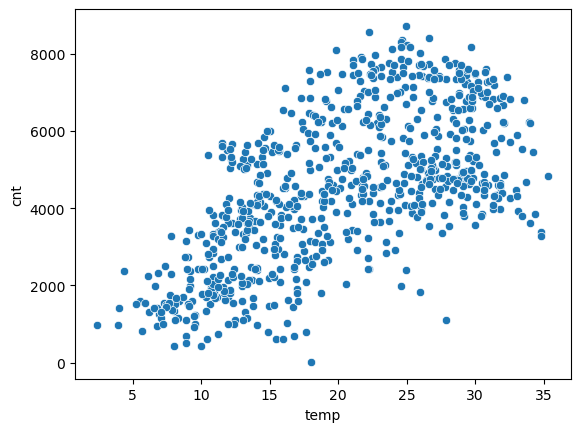

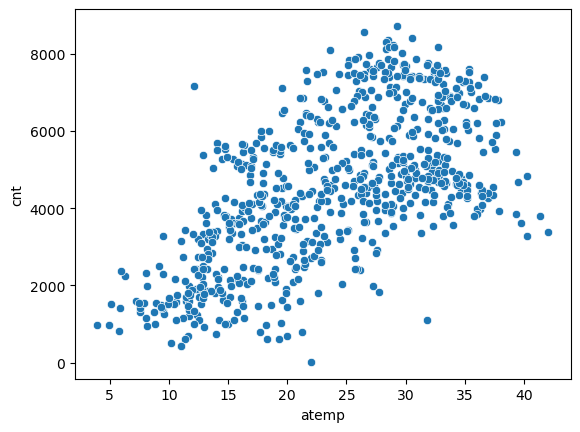

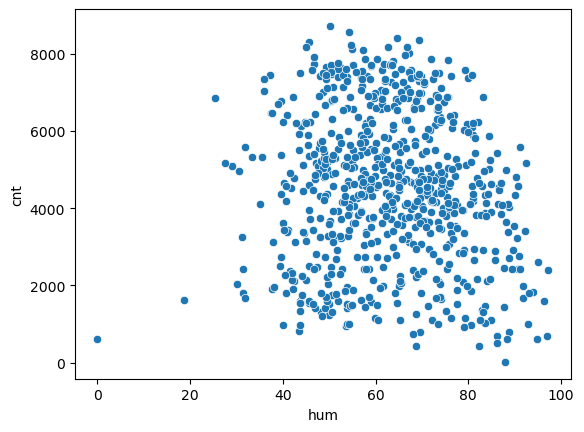

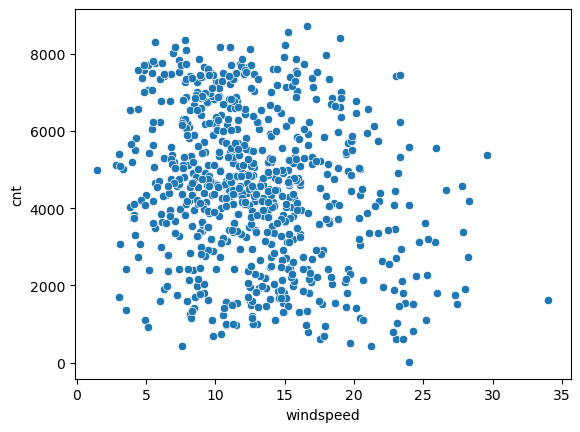

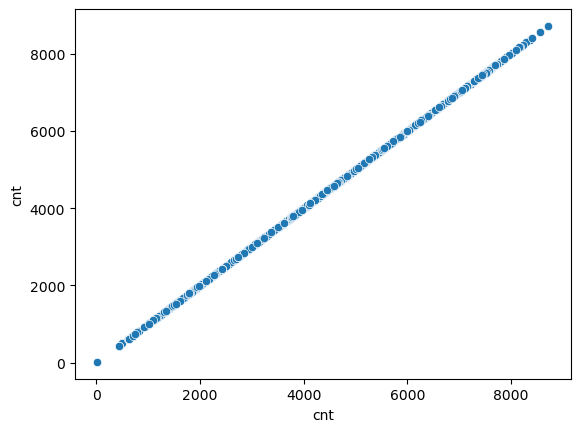

In [254]:
for i in num_col:
    sns.scatterplot(x=bike[i],y=bike["cnt"])
    plt.show()

In [255]:
# Categorical vs Numerical

Bi-variate Analysis of  season  vs count


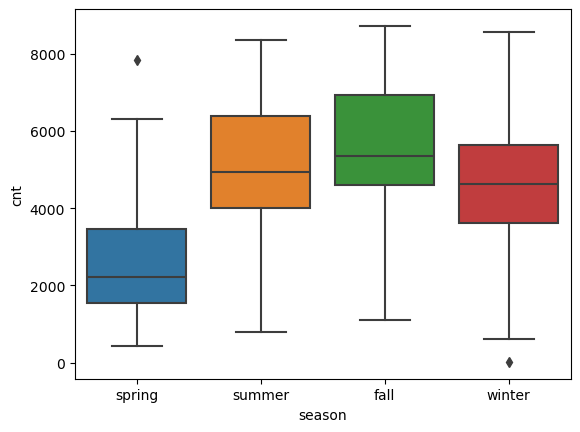

Bi-variate Analysis of  yr  vs count


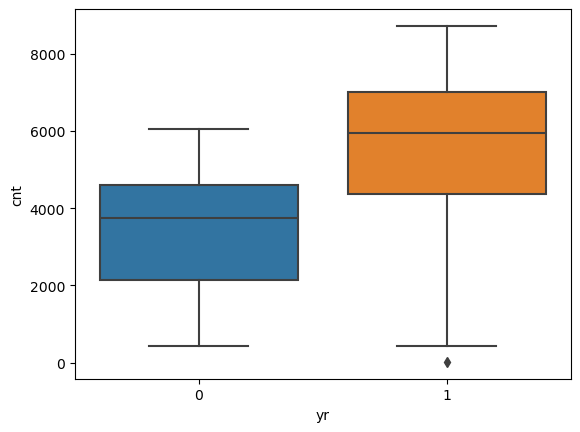

Bi-variate Analysis of  mnth  vs count


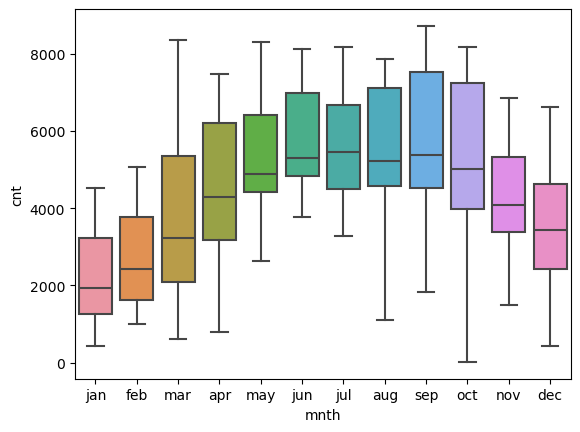

Bi-variate Analysis of  holiday  vs count


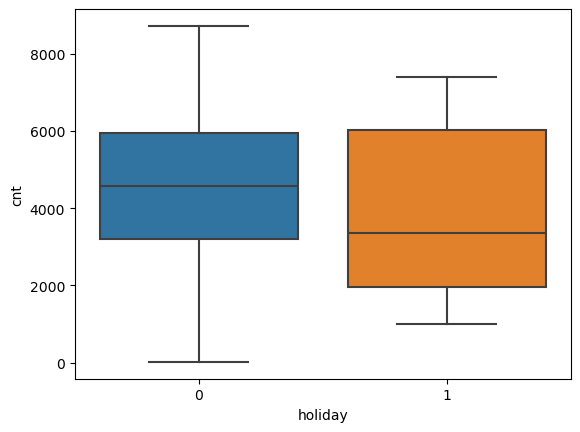

Bi-variate Analysis of  weekday  vs count


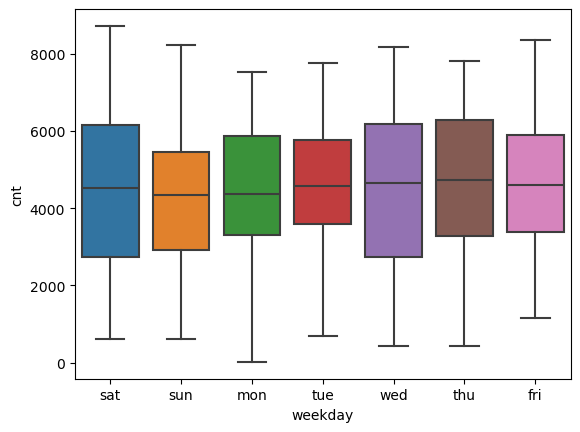

Bi-variate Analysis of  workingday  vs count


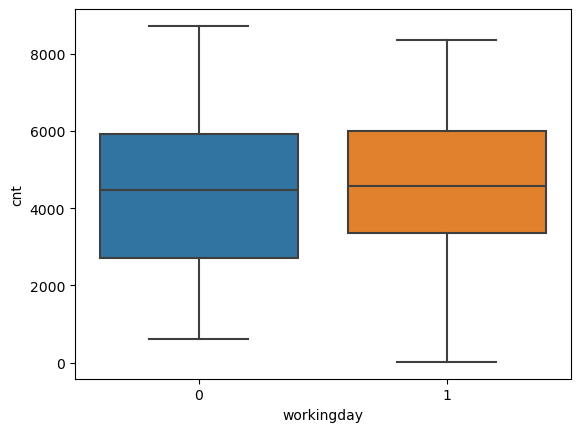

Bi-variate Analysis of  weathersit  vs count


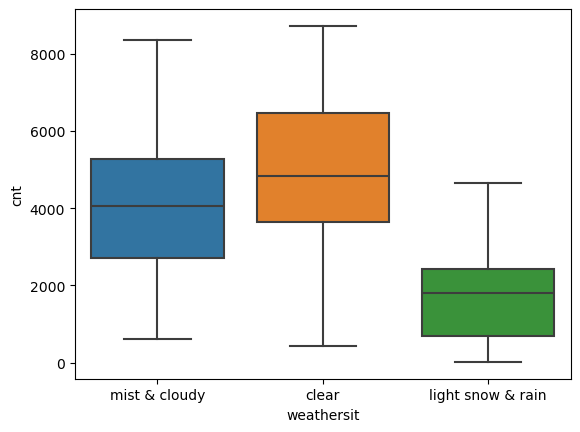

In [256]:
for i in cat_col:
    print("Bi-variate Analysis of ", i," vs count")
    sns.boxplot(x=bike[i],y=bike['cnt'])
    plt.show()

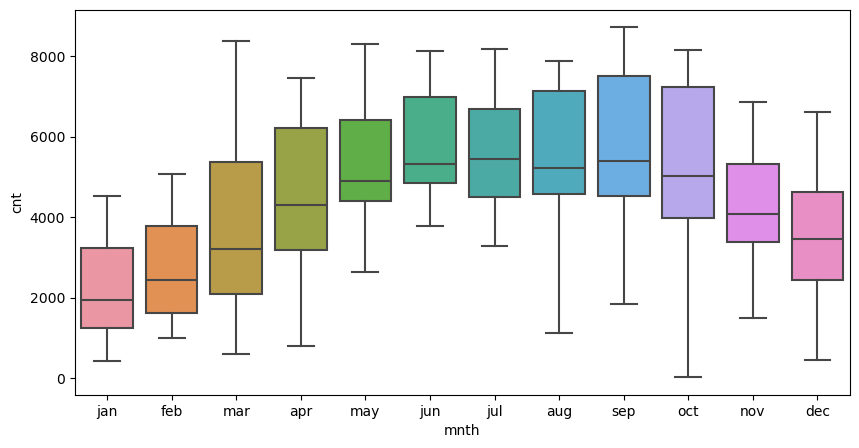

In [257]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'mnth', y = 'cnt', data = bike)
plt.show()


# Inferences on Target column vs Numeric columns

- The target variable 'Cnt' exhibits a positive correlation with the 'tem' pand 'atemp' ' variabee.
- Conversely, the target variable 'Cnt' displays a negative correlation with the 'windspeed' variable.

# Inferences on Target column vs Categorical columns

- Notably, there's a significant decline in the target variable during the spring season.
- Fall emerges as the season with the highest bike rental frequency.
- A discernible upward trend is observed in bike rentals from January to September, followed by a downturn in November and December.
- The peak months for bike rentals are June through September.
- Bike rentals predominantly occur on non-holiday days.
- Daily variations in bike rentals exhibit minimal fluctuation.
- Clear weather conditions with few clouds or partly cloudy skies correspond to higher bike rental rates.
- Bike rentals are observed during light snowfall and rain accompanied by scattered clouds.
- Conversely, heavy rain, thunderstorms, and hailstorms deter bike rentals.
- Interestingly, bike rentals in 2019 surpass those in 2018.

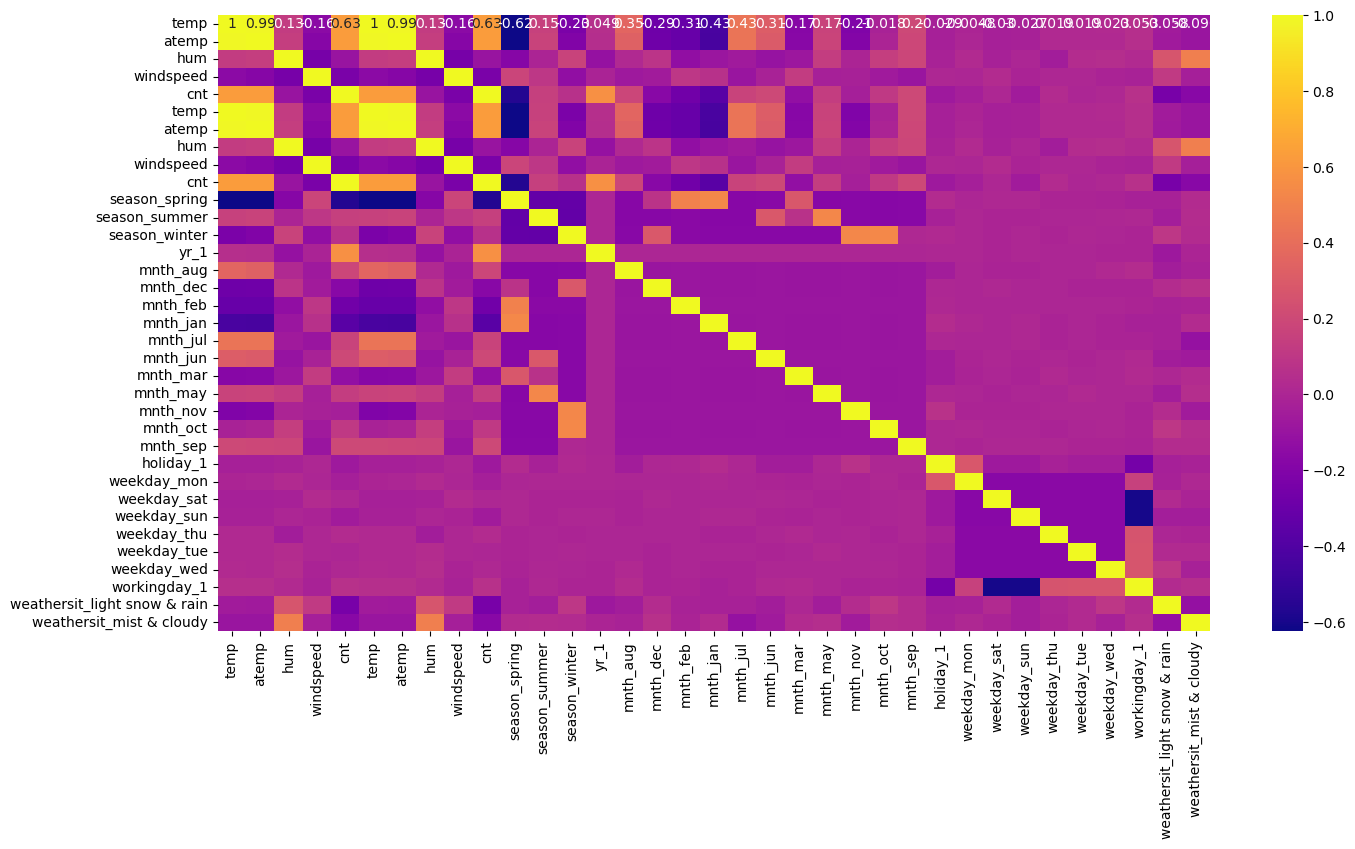

In [258]:
encoded_df = pd.get_dummies(bike, columns=cat_col, drop_first=True)

# Compute correlation matrix
corr_matrix = encoded_df[num_col + list(encoded_df.columns)].corr()

# Plot heatmap
plt.figure(figsize=(16, 8))
sns.heatmap(data=corr_matrix, annot=True, cmap='plasma')
plt.show()

# Correlation Inference:
The target variable demonstrates a strong positive correlation with predictor variables 'temp', 'atemp', and 'yr'.
Conversely, a negative correlation is observed between the target variable and the predictor variable 'windspeed'.
Notably, the predictor variables 'temp' and 'atemp' exhibit a high degree of correlation with each other, indicating the presence of multicollinearity.

In [259]:
# Considering the high correlation between 'temp' and 'atemp', the decision is made to drop the 'atemp' variable.
bike.drop(['atemp'],axis = 1, inplace = True)

# Step 5: Data Preparation

In [260]:
# Generate dummy column for 'season' and store them in a new column called 'season_dummy' and dropping 1st column.
season_dummy = pd.get_dummies(bike['season'])

In [261]:
season_dummy.head()

,fall,spring,summer,winter
0,False,True,False,False
1,False,True,False,False
2,False,True,False,False
3,False,True,False,False
4,False,True,False,False


In [262]:
season_dummy = pd.get_dummies(bike['season'], drop_first = True)

In [263]:
# Generate dummy column for 'mnth' and store them in a new column called 'mnth_dummy' and dropping 1st column.
mnth_dummy = pd.get_dummies(bike['mnth'], drop_first = True)

In [264]:
mnth_dummy.head()

,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
0,False,False,False,True,False,False,False,False,False,False,False
1,False,False,False,True,False,False,False,False,False,False,False
2,False,False,False,True,False,False,False,False,False,False,False
3,False,False,False,True,False,False,False,False,False,False,False
4,False,False,False,True,False,False,False,False,False,False,False


In [265]:
# Generate dummy column for 'weekday' and store it in a new column 'weekday_dummy' and dropping 1st column.
weekday_dummy = pd.get_dummies(bike['weekday'], drop_first = True)

In [266]:
weekday_dummy.head()

,mon,sat,sun,thu,tue,wed
0,False,True,False,False,False,False
1,False,False,True,False,False,False
2,True,False,False,False,False,False
3,False,False,False,False,True,False
4,False,False,False,False,False,True


In [267]:
# Generate dummy column for 'weathersit' and store it in a new column 'weathersit_dummy' and dropping 1st column.
weathersit_dummy = pd.get_dummies(bike['weathersit'], drop_first = True)

In [268]:
weathersit_dummy.head()

,light snow & rain,mist & cloudy
0,False,True
1,False,True
2,False,False
3,False,False
4,False,False


In [269]:
# Adding the dummy column to the original bike df
bike = pd.concat([bike, season_dummy, mnth_dummy, weekday_dummy, weathersit_dummy ], axis = 1)

In [270]:
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,spring,summer,winter,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep,mon,sat,sun,thu,tue,wed,light snow & rain,mist & cloudy
0,spring,0,jan,0,sat,0,mist & cloudy,14.110847,80.5833,10.749882,985,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True
1,spring,0,jan,0,sun,0,mist & cloudy,14.902598,69.6087,16.652113,801,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True
2,spring,0,jan,0,mon,1,clear,8.050924,43.7273,16.636703,1349,True,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
3,spring,0,jan,0,tue,1,clear,8.200000,59.0435,10.739832,1562,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
4,spring,0,jan,0,wed,1,clear,9.305237,43.6957,12.522300,1600,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False


In [271]:
# Drop 'season' , 'mnth' , 'weekday' , 'weathersit' since dummies are already present in it
bike.drop(['season','mnth','weekday','weathersit'], axis = 1, inplace = True)

In [272]:
bike.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep,mon,sat,sun,thu,tue,wed,light snow & rain,mist & cloudy
0,0,0,0,14.110847,80.5833,10.749882,985,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True
1,0,0,0,14.902598,69.6087,16.652113,801,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True
2,0,0,1,8.050924,43.7273,16.636703,1349,True,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
3,0,0,1,8.200000,59.0435,10.739832,1562,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
4,0,0,1,9.305237,43.6957,12.522300,1600,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False


# Step 6: Splitting the Data into Training and Testing Sets

In [273]:
np.random.seed(0)
bike_train, bike_test = train_test_split(bike, train_size = 0.7, test_size = 0.3, random_state = 100)

In [274]:
scaler = MinMaxScaler()

In [275]:
# Apply scaler() to the specific numeric columns
bike_cols = ['cnt','hum','temp','windspeed']
bike_train[bike_cols] = scaler.fit_transform(bike_train[bike_cols])

In [276]:
bike_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep,mon,sat,sun,thu,tue,wed,light snow & rain,mist & cloudy
653,1,0,1,0.509887,0.575354,0.300794,0.864243,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False
576,1,0,1,0.815169,0.725633,0.264686,0.827658,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False
426,1,0,0,0.442393,0.640189,0.255342,0.465255,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,True
728,1,0,0,0.245101,0.498067,0.663106,0.204096,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
482,1,0,0,0.395666,0.504508,0.188475,0.482973,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True


In [277]:
bike_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537262,0.650369,0.320768,0.513620
std,0.500429,0.157763,0.468282,0.225844,0.145882,0.169797,0.224593
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420
50%,1.000000,0.000000,1.000000,0.540519,0.653714,0.296763,0.518638
75%,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Dividing data into X and Y sets for the model building

In [278]:
y_train = bike_train.pop('cnt')
X_train = bike_train

# Step 7: Building a linear model

In [279]:
# Running RFE with the output number of the variable equal to 15

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm,n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [280]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('aug', False, 6),
 ('dec', False, 3),
 ('feb', False, 4),
 ('jan', True, 1),
 ('jul', True, 1),
 ('jun', False, 13),
 ('mar', False, 14),
 ('may', False, 5),
 ('nov', False, 2),
 ('oct', False, 10),
 ('sep', True, 1),
 ('mon', False, 8),
 ('sat', True, 1),
 ('sun', False, 7),
 ('thu', False, 11),
 ('tue', False, 9),
 ('wed', False, 12),
 ('light snow & rain', True, 1),
 ('mist & cloudy', True, 1)]

In [281]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'spring',
       'summer', 'winter', 'jan', 'jul', 'sep', 'sat', 'light snow & rain',
       'mist & cloudy'],
      dtype='object')

In [282]:
X_train.columns[~rfe.support_]

Index(['aug', 'dec', 'feb', 'jun', 'mar', 'may', 'nov', 'oct', 'mon', 'sun',
       'thu', 'tue', 'wed'],
      dtype='object')

# Model 1

In [283]:
# Creating X_test df with RFE col
X_train_rfe = X_train[col]

In [284]:
# Check data types of all columns
column_types = X_train_rfe.dtypes

# Iterate over each column and convert to integer if it's boolean
for column in column_types.index:
    if column_types[column] == 'bool':
        X_train_rfe[column] = X_train_rfe[column].astype(int)

# Verify the changes
print(X_train_rfe.dtypes)

yr                     int64
holiday                int64
workingday             int64
temp                 float64
hum                  float64
windspeed            float64
spring                 int32
summer                 int32
winter                 int32
jan                    int32
jul                    int32
sep                    int32
sat                    int32
light snow & rain      int32
mist & cloudy          int32
dtype: object


In [285]:
X_train_lm = sm.add_constant(X_train_rfe)

In [286]:
# Build a 1st fitted model
lr_1 = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

In [287]:
#Let's see the summary of our linear model
lr_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.6
Date:                Wed, 05 Jun 2024   Prob (F-statistic):          2.31e-191
Time:                        17:14:05   Log-Likelihood:                 519.88
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     494   BIC:                            -940.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.2510      0.036      6.949      0.000       0.180       0.322
yr                    0.2305      0.008     28.807      0.000       0.215       0.246
holiday              -0.0585      0.027     -2.178      0.030      -0.111      -0.006
workingday            0.0435      0.012      3.781      0.000       0.021       0.066
temp                  0.5098      0.034     14.851      0.000       0.442       0.577
hum                  -0.1547      0.037     -4.145      0.000      -0.228      -0.081
windspeed            -0.1860      0.025     -7.301      0.000      -0.236      -0.136
spring               -0.0508      0.021     -2.461      0.014      -0.091      -0.010
summer                0.0497      0.015      3.346      0.001       0.020       0.079
winter                0.0944      0.017      5.479      0.000       0.061       0.128
jan                  -0.0343      0.017     -1.980      0.048      -0.068      -0.000
jul                  -0.0532      0.018     -2.947      0.003      -0.089      -0.018
sep                   0.0812      0.016      4.934      0.000       0.049       0.114
sat                   0.0537      0.014      3.707      0.000       0.025       0.082
light snow & rain    -0.2488      0.026     -9.560      0.000      -0.300      -0.198
mist & cloudy        -0.0578      0.010     -5.574      0.000      -0.078      -0.037
==============================================================================
Omnibus:                       66.344   Durbin-Watson:                   2.071
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              161.565
Skew:                          -0.676   Prob(JB):                     8.25e-36
Kurtosis:                       5.403   Cond. No.                         22.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [288]:
# Calculating the VIFs
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,hum,29.40
3,temp,17.77
2,workingday,5.31
5,windspeed,4.73
6,spring,4.53
8,winter,3.48
7,summer,2.84
14,mist & cloudy,2.29
0,yr,2.09
12,sat,1.98


# Dropping the column and updating the model


Based n oabove observationsry and the VIF dataframe, some variables remain insignificant. One such variable is`jna`, which has a high p-value of `0.048`. Therefore, we will proceed to drop this variable.

In [289]:
# Dropping Variable with Very High p-Value

X_train_rfe = X_train_rfe.drop(columns=['jan'])

# Model 2

In [290]:
X_train_lm = sm.add_constant(X_train_rfe)

lr_2 = sm.OLS(y_train, X_train_lm).fit()

In [292]:
lr_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.3
Date:                Wed, 05 Jun 2024   Prob (F-statistic):          1.13e-191
Time:                        17:15:00   Log-Likelihood:                 517.87
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     495   BIC:                            -942.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.2394      0.036      6.696      0.000       0.169       0.310
yr                    0.2297      0.008     28.660      0.000       0.214       0.245
holiday              -0.0594      0.027     -2.206      0.028      -0.112      -0.006
workingday            0.0432      0.012      3.744      0.000       0.021       0.066
temp                  0.5278      0.033     15.897      0.000       0.463       0.593
hum                  -0.1595      0.037     -4.268      0.000      -0.233      -0.086
windspeed            -0.1806      0.025     -7.110      0.000      -0.231      -0.131
spring               -0.0554      0.021     -2.694      0.007      -0.096      -0.015
summer                0.0526      0.015      3.553      0.000       0.024       0.082
winter                0.1003      0.017      5.890      0.000       0.067       0.134
jul                  -0.0549      0.018     -3.035      0.003      -0.090      -0.019
sep                   0.0818      0.016      4.956      0.000       0.049       0.114
sat                   0.0532      0.015      3.661      0.000       0.025       0.082
light snow & rain    -0.2463      0.026     -9.449      0.000      -0.298      -0.195
mist & cloudy        -0.0578      0.010     -5.559      0.000      -0.078      -0.037
==============================================================================
Omnibus:                       64.879   Durbin-Watson:                   2.065
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              158.454
Skew:                          -0.661   Prob(JB):                     3.91e-35
Kurtosis:                       5.390   Cond. No.                         21.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [293]:
# Calculating the VIFs for the new model
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,hum,28.49
3,temp,16.97
2,workingday,5.28
5,windspeed,4.72
6,spring,4.24
8,winter,3.44
7,summer,2.83
13,mist & cloudy,2.28
0,yr,2.08
11,sat,1.97


# Dropping the variable and updating the model

As you can see from the summary and the VIF dataframe, some variables are still insignificant. One of these variables is, holiday as it has a very high p-value  of `0.028`. Let's go ahead and drop this variable.

In [294]:
# Dropping varaible with very high p-value

X_train_rfe = X_train_rfe.drop(columns=['holiday'])

# Model 3

In [295]:
X_train_lm = sm.add_constant(X_train_rfe)
lr_3 = sm.OLS(y_train, X_train_lm).fit()

In [296]:
# Print the summary of the model
lr_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     209.4
Date:                Wed, 05 Jun 2024   Prob (F-statistic):          8.51e-192
Time:                        17:15:24   Log-Likelihood:                 515.37
No. Observations:                 510   AIC:                            -1003.
Df Residuals:                     496   BIC:                            -943.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.2298      0.036      6.451      0.000       0.160       0.300
yr                    0.2300      0.008     28.580      0.000       0.214       0.246
workingday            0.0521      0.011      4.790      0.000       0.031       0.073
temp                  0.5279      0.033     15.838      0.000       0.462       0.593
hum                  -0.1578      0.037     -4.209      0.000      -0.232      -0.084
windspeed            -0.1812      0.025     -7.106      0.000      -0.231      -0.131
spring               -0.0565      0.021     -2.736      0.006      -0.097      -0.016
summer                0.0530      0.015      3.562      0.000       0.024       0.082
winter                0.0993      0.017      5.813      0.000       0.066       0.133
jul                  -0.0537      0.018     -2.962      0.003      -0.089      -0.018
sep                   0.0797      0.017      4.819      0.000       0.047       0.112
sat                   0.0622      0.014      4.438      0.000       0.035       0.090
light snow & rain    -0.2455      0.026     -9.383      0.000      -0.297      -0.194
mist & cloudy        -0.0576      0.010     -5.512      0.000      -0.078      -0.037
==============================================================================
Omnibus:                       71.749   Durbin-Watson:                   2.047
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              186.211
Skew:                          -0.707   Prob(JB):                     3.67e-41
Kurtosis:                       5.601   Cond. No.                         21.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [298]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,28.41
2,temp,16.87
1,workingday,4.71
4,windspeed,4.70
5,spring,4.18
7,winter,3.40
6,summer,2.83
12,mist & cloudy,2.28
0,yr,2.08
10,sat,1.84


# Dropping the variable and updating the model

As you can see from the summary and the VIF dataframe, some variables are still insignificant. One of these variables is, hum as it has a very high VIF of `28.41`. Let's go ahead and drop this variable.

In [299]:
# Dropping varaible with high VIF
X_train_rfe = X_train_rfe.drop(columns=['hum'])

# Model 4

In [300]:
X_train_lm = sm.add_constant(X_train_rfe)
lr_4 = sm.OLS(y_train, X_train_lm).fit()

In [301]:
lr_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     218.1
Date:                Wed, 05 Jun 2024   Prob (F-statistic):          3.28e-189
Time:                        17:15:45   Log-Likelihood:                 506.42
No. Observations:                 510   AIC:                            -986.8
Df Residuals:                     497   BIC:                            -931.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.1493      0.031      4.886      0.000       0.089       0.209
yr                    0.2338      0.008     28.766      0.000       0.218       0.250
workingday            0.0547      0.011      4.962      0.000       0.033       0.076
temp                  0.4925      0.033     15.020      0.000       0.428       0.557
windspeed            -0.1500      0.025     -6.047      0.000      -0.199      -0.101
spring               -0.0662      0.021     -3.174      0.002      -0.107      -0.025
summer                0.0469      0.015      3.117      0.002       0.017       0.076
winter                0.0851      0.017      4.997      0.000       0.052       0.119
jul                  -0.0489      0.018     -2.657      0.008      -0.085      -0.013
sep                   0.0738      0.017      4.408      0.000       0.041       0.107
sat                   0.0666      0.014      4.688      0.000       0.039       0.094
light snow & rain    -0.2892      0.024    -11.845      0.000      -0.337      -0.241
mist & cloudy        -0.0830      0.009     -9.581      0.000      -0.100      -0.066
==============================================================================
Omnibus:                       72.688   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              185.799
Skew:                          -0.721   Prob(JB):                     4.51e-41
Kurtosis:                       5.581   Cond. No.                         19.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [302]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,6.73
1,workingday,4.65
3,windspeed,4.64
4,spring,2.38
5,summer,2.31
0,yr,2.07
6,winter,1.92
9,sat,1.83
7,jul,1.58
11,mist & cloudy,1.56


# Dropping the variable and updating the model

As you can see from the summary and the VIF dataframe, some variables are still insignificant. One of these variables is, 'jul' as it has a p-value of of `0.008`. Let's go ahead and drop this variable.

In [303]:
# Dropping varaible with high p-value
X_train_rfe = X_train_rfe.drop(columns=['jul'])

# Model 5

In [304]:
X_train_lm = sm.add_constant(X_train_rfe)
lr_5 = sm.OLS(y_train, X_train_lm).fit()

In [305]:
lr_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     234.4
Date:                Wed, 05 Jun 2024   Prob (F-statistic):          6.86e-189
Time:                        17:17:24   Log-Likelihood:                 502.83
No. Observations:                 510   AIC:                            -981.7
Df Residuals:                     498   BIC:                            -930.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.1405      0.031      4.599      0.000       0.081       0.201
yr                    0.2343      0.008     28.664      0.000       0.218       0.250
workingday            0.0557      0.011      5.021      0.000       0.034       0.077
temp                  0.4800      0.033     14.702      0.000       0.416       0.544
windspeed            -0.1501      0.025     -6.014      0.000      -0.199      -0.101
spring               -0.0551      0.021     -2.680      0.008      -0.096      -0.015
summer                0.0615      0.014      4.370      0.000       0.034       0.089
winter                0.0972      0.017      5.885      0.000       0.065       0.130
sep                   0.0872      0.016      5.421      0.000       0.056       0.119
sat                   0.0669      0.014      4.682      0.000       0.039       0.095
light snow & rain    -0.2902      0.025    -11.813      0.000      -0.338      -0.242
mist & cloudy        -0.0817      0.009     -9.391      0.000      -0.099      -0.065
==============================================================================
Omnibus:                       76.386   Durbin-Watson:                   2.073
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              190.041
Skew:                          -0.765   Prob(JB):                     5.41e-42
Kurtosis:                       5.569   Cond. No.                         19.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [306]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.48
1,workingday,4.65
3,windspeed,4.63
4,spring,2.30
0,yr,2.07
5,summer,1.99
8,sat,1.83
6,winter,1.77
10,mist & cloudy,1.56
7,sep,1.23


# Dropping the column and updating the model
Based on above observationsry and the VIF dataframe, some variables remain insignificant. One such variable is 'spring', which has a high p-value of `0.008`. Therefore, we will proceed to drop this variable.

In [307]:
# Dropping varaible with very high p-value
X_train_rfe = X_train_rfe.drop(columns=['spring'])

# Model 6

In [308]:
X_train_lm = sm.add_constant(X_train_rfe)
lr_6 = sm.OLS(y_train, X_train_lm).fit()

In [309]:
lr_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     254.0
Date:                Wed, 05 Jun 2024   Prob (F-statistic):          1.47e-188
Time:                        17:18:26   Log-Likelihood:                 499.18
No. Observations:                 510   AIC:                            -976.4
Df Residuals:                     499   BIC:                            -929.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0753      0.019      4.051      0.000       0.039       0.112
yr                    0.2331      0.008     28.382      0.000       0.217       0.249
workingday            0.0563      0.011      5.048      0.000       0.034       0.078
temp                  0.5499      0.020     27.885      0.000       0.511       0.589
windspeed            -0.1552      0.025     -6.201      0.000      -0.204      -0.106
summer                0.0874      0.010      8.481      0.000       0.067       0.108
winter                0.1318      0.010     12.760      0.000       0.112       0.152
sep                   0.0972      0.016      6.181      0.000       0.066       0.128
sat                   0.0677      0.014      4.710      0.000       0.039       0.096
light snow & rain    -0.2880      0.025    -11.659      0.000      -0.337      -0.239
mist & cloudy        -0.0813      0.009     -9.292      0.000      -0.099      -0.064
==============================================================================
Omnibus:                       68.959   Durbin-Watson:                   2.080
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              153.793
Skew:                          -0.731   Prob(JB):                     4.02e-34
Kurtosis:                       5.258   Cond. No.                         11.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [310]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.76
1,workingday,4.04
3,windspeed,3.43
0,yr,2.02
7,sat,1.69
4,summer,1.57
9,mist & cloudy,1.53
5,winter,1.40
6,sep,1.20
8,light snow & rain,1.08


Now, we can see, both the p-values and VIF are within an acceptable range. Therefore, we can proceed to make our predictions using this model.

# Step 8: Residual Analysis of the Train Data

To verify if the error terms are normally distributed (a key assumption of linear regression), we will plot a histogram of the error terms and examine its distribution.

In [311]:
y_train_pred = lr_6.predict(X_train_lm)

Text(0.5, 0, 'Errors')

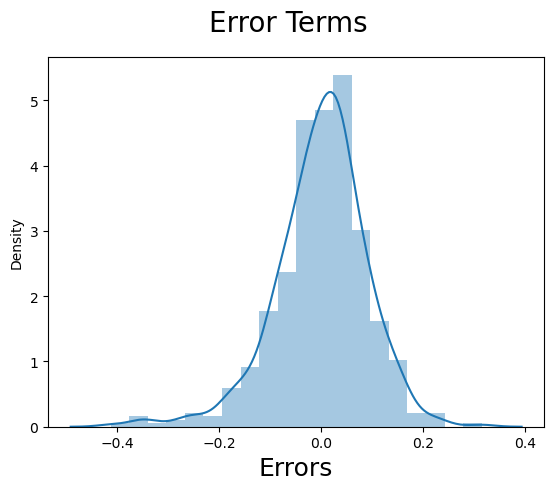

In [312]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)

# Step 9: Making Predictions Using the Final Model
With the model fitted and the normality of error terms verified, we can proceed to make predictions using the final model.

In [313]:
# Apply scaler() to the specific numeric columns 
bike_cols = ['cnt','hum','temp','windspeed']
bike_test[bike_cols] = scaler.transform(bike_test[bike_cols])

In [314]:
bike_test.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.698630,0.558941,0.638508,0.313350,0.520592
std,0.500722,0.188034,0.459904,0.233698,0.148974,0.159947,0.218435
min,0.000000,0.000000,0.000000,0.046591,0.261915,-0.042808,0.048205
25%,0.000000,0.000000,0.000000,0.354650,0.527265,0.198517,0.377531
50%,0.000000,0.000000,1.000000,0.558691,0.627737,0.299459,0.524275
75%,1.000000,0.000000,1.000000,0.759096,0.743928,0.403048,0.672745
max,1.000000,1.000000,1.000000,0.984424,1.002146,0.807474,0.963300


# Dividing into X_test and y_test

In [315]:
y_test = bike_test.pop('cnt')
X_test = bike_test

In [316]:
# Using the Model to Make Predictions

# Creating the `X_test_new` DataFrame by dropping unnecessary variables from `X_test`
X_test_new = X_test[X_train_rfe.columns]

X_test_new = sm.add_constant(X_test_new)

In [317]:
# Prediction Making
y_test_pred = lr_6.predict(X_test_new)

# Step 10: Model Evaluation

Let's calculate the R-squared value of the final model on both the train dataset and test dataset.

In [318]:
print('Trained R-Score: ',round(r2_score(y_train,y_train_pred),4))
print('Test R-Score is: ',round(r2_score(y_test,y_test_pred),4))

Trained R-Score:  0.8358
Test R-Score is:  0.7956


Text(0, 0.5, 'y_test_pred')

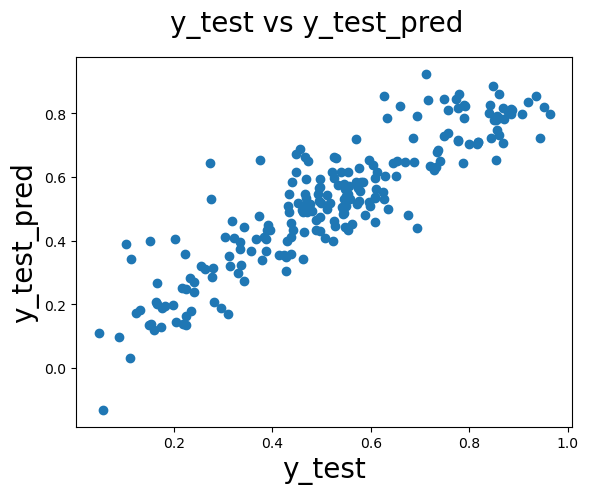

In [319]:
# Visualizing y_test and y_test_pred to Understand the Spread
fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize = 20)
plt.xlabel('y_test', fontsize = 20)
plt.ylabel('y_test_pred', fontsize = 20)      


The equation for best fitted line is:

cnt = 0.0753 + 0.2231  \times  yr + 0.0563  \times  workingday + 0.5499 \times temp - 0.1552 \times windspeed + 0.0874 \times summer + 0.1318 \times winter + 0.0972 \times sep + 0.0677 \times sat - 0.2880 \times light snow and rain - 0.0813 \times mist and cloudy


# Conclusion